# Assignment 2 Question 5

## Ahmad Soni - 668564

## Nasiem Ayob - 1825850

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import math
import seaborn as sns
import geopandas
from matplotlib.pyplot import figure

First we load in our data and display what we are working with, we will use the cleaned dataset we made in Question 1

In [2]:
df = pd.read_csv('cleaned.csv')

df_test = pd.read_csv('cleaned.csv')

#Removing rows with missing values
my_list = df['trip_duration'].values.tolist()
indices = [i for i, x in enumerate(my_list) if x == " "]
df = df.drop(indices)

df_test = df.copy()

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594,Saturday


In [3]:
duration = df[['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']]
duration

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455
1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663
2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124
3,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429
4,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...
1458639,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,778
1458640,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,764
1458642,2016-01-05 15:56:26,2016-01-05 16:02:39,-73.982079,40.749062,-73.974632,40.757107,373


Since we are only provided with co-ordinates, we need to triangulate the position of the Empire State Building as well as the JFK Airport. We do this by looking up the co-ordinates of these two locations and then manually constructing a box within 5km of each landmark. We have to construct this box as we assume that every passenger travelling to and from these places will be picked up and dropped off at various places around the locations and definitely not from one single pickup and dropoff point.

In [4]:
compare = duration[duration['pickup_longitude'].between(-73.988763,-73.982588)]
compare = compare[compare['pickup_latitude'].between(40.747182,40.749843 )]


compare = compare[compare['dropoff_longitude'].between(-73.789912,-73.779484)]
compare = compare[compare['dropoff_latitude'].between(40.640489,40.648939)]
compare


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
3229,2016-06-01 14:29:00,2016-06-01 15:44:28,-73.987869,40.748219,-73.783760,40.643600,4528
36277,2016-04-20 17:04:41,2016-04-20 18:25:49,-73.983879,40.749222,-73.789604,40.647102,4868
116037,2016-06-24 20:50:05,2016-06-24 21:22:40,-73.982803,40.748531,-73.783218,40.643841,1955
146926,2016-02-16 05:34:23,2016-02-16 06:03:54,-73.987434,40.748589,-73.782898,40.644032,1771
189078,2016-02-16 09:09:19,2016-02-16 09:47:57,-73.988228,40.747517,-73.782547,40.644127,2318
...,...,...,...,...,...,...,...
1297467,2016-01-09 16:35:22,2016-01-09 17:09:35,-73.983109,40.747784,-73.781837,40.648579,2053
1390059,2016-06-02 09:48:09,2016-06-02 11:39:55,-73.985107,40.748135,-73.782730,40.644001,6706
1395631,2016-05-22 16:37:34,2016-05-22 17:31:08,-73.983276,40.749477,-73.785851,40.643250,3214
1419499,2016-06-27 15:00:46,2016-06-27 16:27:21,-73.988197,40.747684,-73.782608,40.644100,5195


We now have the trips where passengers travelled from the Empire State Building to JFK Airport

 We now create some copies of this dataset for later as well as calculate our trip mean duration

In [5]:

compare3 = compare.copy()
JFKTrip = compare['trip_duration']
JFKTrip.mean()

2952.909090909091

We need to convert our datetime to just time values so we can evaluate when people are travelling  in the day

In [6]:
compare['pickup_datetime'] = pd.to_datetime(compare['pickup_datetime']).dt.time
compare['dropoff_datetime'] = pd.to_datetime(compare['dropoff_datetime']).dt.time
compare

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
3229,14:29:00,15:44:28,-73.987869,40.748219,-73.783760,40.643600,4528
36277,17:04:41,18:25:49,-73.983879,40.749222,-73.789604,40.647102,4868
116037,20:50:05,21:22:40,-73.982803,40.748531,-73.783218,40.643841,1955
146926,05:34:23,06:03:54,-73.987434,40.748589,-73.782898,40.644032,1771
189078,09:09:19,09:47:57,-73.988228,40.747517,-73.782547,40.644127,2318
...,...,...,...,...,...,...,...
1297467,16:35:22,17:09:35,-73.983109,40.747784,-73.781837,40.648579,2053
1390059,09:48:09,11:39:55,-73.985107,40.748135,-73.782730,40.644001,6706
1395631,16:37:34,17:31:08,-73.983276,40.749477,-73.785851,40.643250,3214
1419499,15:00:46,16:27:21,-73.988197,40.747684,-73.782608,40.644100,5195


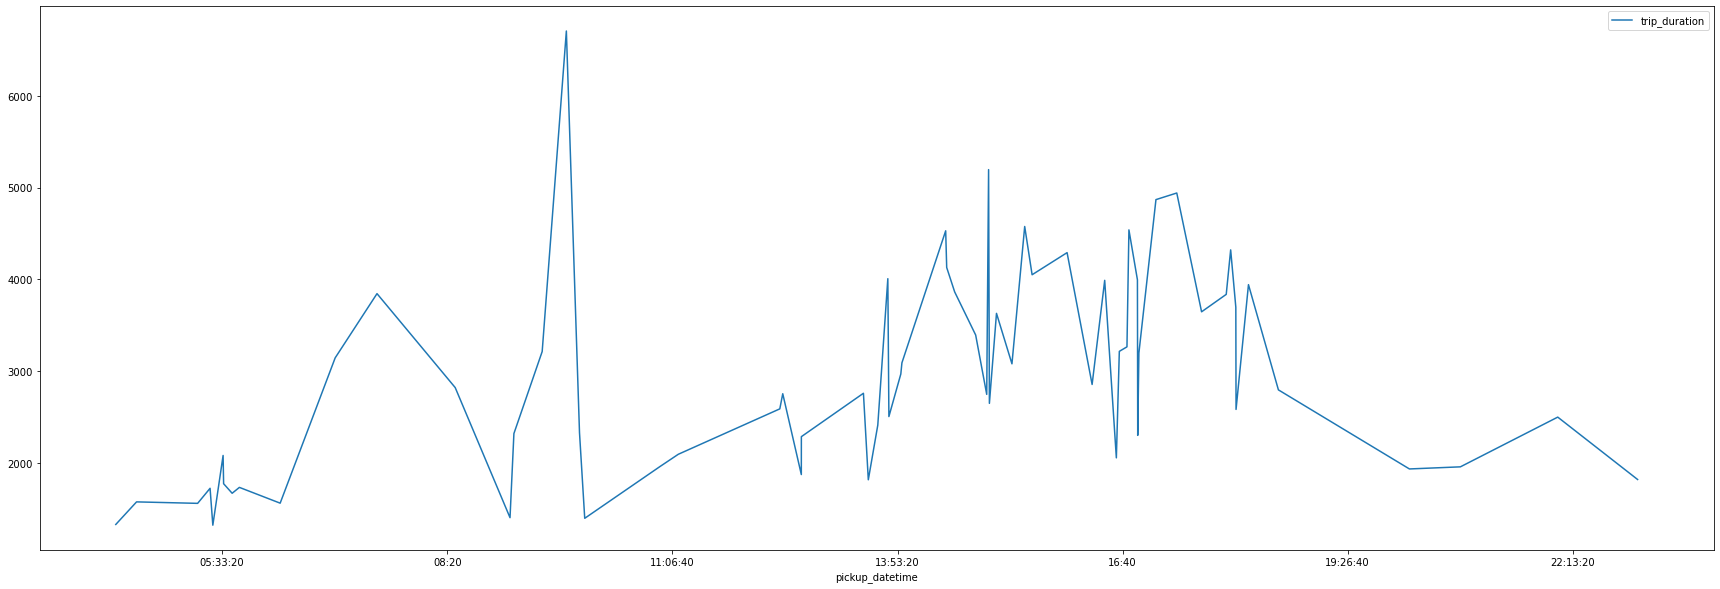

In [7]:

fig = compare.plot(y = "trip_duration", x= "pickup_datetime",figsize=(30, 10))


We can see from this graph that there is a large spike in passengers travelling to the airport from the Empire State Building in the mornings as well as peak work hours. This makes sense as, in general, the people most frequently travelling on a daily basis are people who are travelling for work reasons. There are, of course, flights going in and out of international airports at all times of day, but they are more frequent at peak work hours. This also logistically makes sense for airports as they have more active staff in the daytime.

We now apply the same strategy to newark airport by drawing our 5km box around the airport

In [13]:
compare3 = duration.copy()

compare3 = compare3[compare3['pickup_longitude'].between(-73.988763,-73.982588)]
compare3 = compare3[compare3['pickup_latitude'].between(40.747182,40.749843 )]


compare3 = compare3[compare3['dropoff_longitude'].between(-74.191753,-74.168538)]
compare3 = compare3[compare3['dropoff_latitude'].between(40.687076,40.701065)]


compare3

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
21674,2016-06-16 01:17:30,2016-06-16 02:11:04,-73.986214,40.749790,-74.177269,40.695129,3214
88816,2016-05-01 14:49:50,2016-05-01 15:26:26,-73.983269,40.749836,-74.181725,40.687737,2196
102008,2016-06-20 11:00:34,2016-06-20 11:38:17,-73.985100,40.747971,-74.181824,40.687771,2263
170286,2016-03-04 15:04:28,2016-03-04 15:49:44,-73.987671,40.749126,-74.182732,40.687851,2716
221596,2016-06-23 12:56:09,2016-06-23 13:28:14,-73.983994,40.749409,-74.177101,40.694801,1925
251496,2016-02-14 17:05:40,2016-02-14 17:58:21,-73.984528,40.748241,-74.177940,40.695549,3161
553657,2016-02-06 07:50:21,2016-02-06 08:14:45,-73.983879,40.749348,-74.177078,40.694996,1464
639205,2016-03-12 03:11:56,2016-03-12 03:40:42,-73.988579,40.748470,-74.182426,40.687721,1726
654687,2016-03-03 17:37:58,2016-03-03 18:15:03,-73.985291,40.747822,-74.177773,40.690350,2225
785139,2016-03-27 14:09:37,2016-03-27 14:44:06,-73.987701,40.747269,-74.177261,40.695179,2069


We calculate our mean trip duration

In [14]:
NewarkTrip = compare3['trip_duration']
NewarkTrip.mean()

2261.9523809523807

In [15]:
compare3['pickup_datetime'] = pd.to_datetime(compare3['pickup_datetime']).dt.time
compare3['dropoff_datetime'] = pd.to_datetime(compare3['dropoff_datetime']).dt.time
compare3

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
21674,01:17:30,02:11:04,-73.986214,40.749790,-74.177269,40.695129,3214
88816,14:49:50,15:26:26,-73.983269,40.749836,-74.181725,40.687737,2196
102008,11:00:34,11:38:17,-73.985100,40.747971,-74.181824,40.687771,2263
170286,15:04:28,15:49:44,-73.987671,40.749126,-74.182732,40.687851,2716
221596,12:56:09,13:28:14,-73.983994,40.749409,-74.177101,40.694801,1925
251496,17:05:40,17:58:21,-73.984528,40.748241,-74.177940,40.695549,3161
553657,07:50:21,08:14:45,-73.983879,40.749348,-74.177078,40.694996,1464
639205,03:11:56,03:40:42,-73.988579,40.748470,-74.182426,40.687721,1726
654687,17:37:58,18:15:03,-73.985291,40.747822,-74.177773,40.690350,2225
785139,14:09:37,14:44:06,-73.987701,40.747269,-74.177261,40.695179,2069


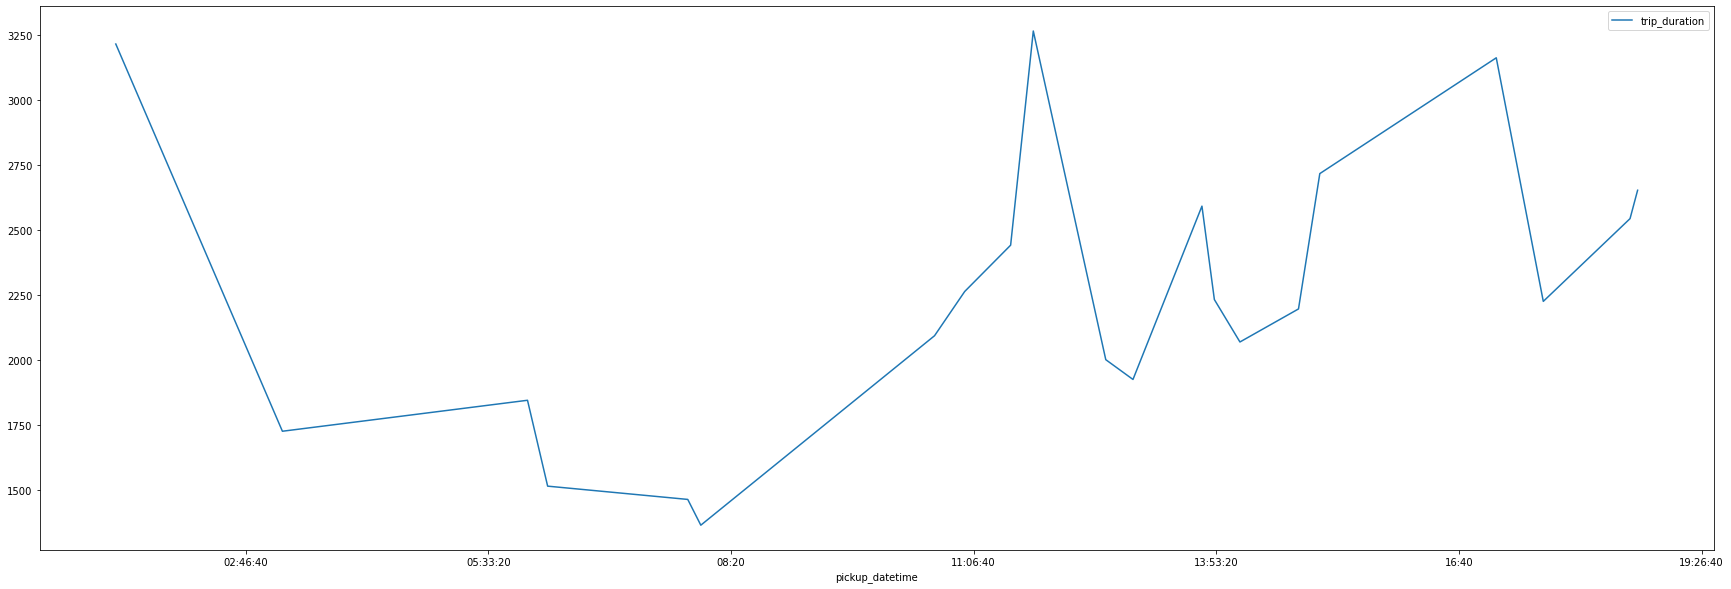

In [16]:
fig = compare3.plot(y = "trip_duration", x= "pickup_datetime",figsize=(30, 10))

For Newark we have a lot less passengers travelling from the Empire State Building despite their distance being relatively similar. This could be because Newark offers less flights or to less destinations. We can see our travel at times of day remains relatively similar with peak hours having the most passengers. In this case we have a couple very early morning/late night travellers.

Our mean travel time for Jfk was 2952.909 and our mean travel time for Newark was 2261.952. This makes sense as Newark is closer to JFK location wise, so we would expect our travel time to Newark to be less.